In [53]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [54]:
data = np.load('./log/dna-HepG2.npz')
decoding  = data['decoding']
pre_trained = data['baseline']

In [55]:
data = np.load('log/dna-HepG2_DPS.npz')
DPS  = data['decoding']
pre_trained2 = data['baseline']

In [56]:
data = np.load('log/dna-HepG2_TDS.npz')
SMC  = data['decoding']
pre_trained3 = data['baseline']

In [57]:
data = np.load('./log/dna-HepG2_tw.npz')
decoding2  = data['decoding']
pre_trained4 = data['baseline']
pre_trained = np.concatenate([pre_trained, pre_trained2, pre_trained3, pre_trained4])


In [58]:
bestk =[]
for i in range(int(len(pre_trained)/10)-1 ):
    bestk.append(np.max(pre_trained[i*10: (i+1) * 10]) )

In [59]:
print( np.quantile(pre_trained, 0.5), np.quantile(bestk, 0.5), np.quantile(DPS, 0.5), np.quantile(SMC, 0.5), np.quantile(decoding, 0.5), np.quantile(decoding2, 0.5) )
print( np.quantile(pre_trained, 0.8), np.quantile(bestk, 0.8), np.quantile(DPS, 0.8), np.quantile(SMC, 0.8), np.quantile(decoding, 0.8), np.quantile(decoding2, 0.8) )
print( np.quantile(pre_trained, 0.9), np.quantile(bestk, 0.9), np.quantile(DPS, 0.9), np.quantile(SMC,0.9), np.quantile(decoding, 0.9), np.quantile(decoding2, 0.9) )



0.1159750297665596 1.7680395245552063 3.782426357269287 3.6831631660461426 5.073857307434082 5.3529372215271
0.7143829107284546 3.134634113311768 4.648003005981446 4.1311211585998535 5.492795848846436 6.50999116897583
1.3788235306739807 3.4508535861968994 4.8787720680236815 4.5256524085998535 5.639077281951904 6.980253219604492


In [61]:
std_list =[ np.std(pre_trained)/np.sqrt(np.shape(pre_trained)[0]), np.std(bestk)/np.sqrt(np.shape(bestk)[0]), np.std(DPS)/np.sqrt(np.shape(DPS)[0]), np.std(SMC)/np.sqrt(np.shape(SMC)[0]), np.std(decoding)/np.sqrt(np.shape(SMC)[0]), np.std(decoding2)/np.sqrt(np.shape(decoding2)[0])]
std_list = np.array(std_list)
print(std_list * np.sqrt(0.5 * 0.5))
print(std_list * np.sqrt(0.2 * 0.8))
print(std_list * np.sqrt(0.1 * 0.9))



[0.01833683 0.07750401 0.06027401 0.04765446 0.03121865 0.05059109]
[0.01466946 0.06200321 0.04821921 0.03812357 0.02497492 0.04047287]
[0.0110021  0.0465024  0.03616441 0.02859268 0.01873119 0.03035465]


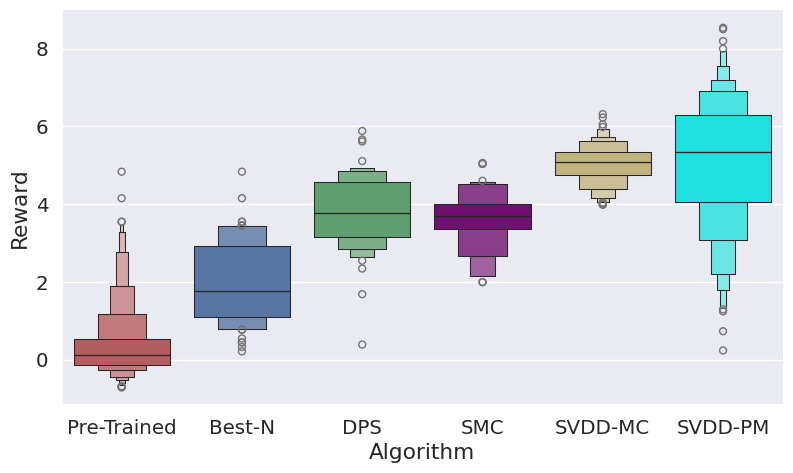

In [62]:

compare = np.concatenate( (pre_trained , bestk, DPS, SMC, decoding, decoding2 ), axis= 0)

type1 = ['Pre-Trained' for i in range(len(pre_trained ))]
type2 = ['Best-N' for i in range(len(bestk))]
type3 = ['DPS' for i in range(len(DPS))]
type4 = ['SMC' for i in range(len(SMC))]
type5 = ['SVDD-MC' for i in range(len(decoding))]
type6 = ['SVDD-PM' for i in range(len(decoding2))]

type =   type1 + type2   + type3 +  type4 + type5 + type6
data_dict = {'Algorithm': type, 'Reward': compare }
plot_data = pd.DataFrame(data_dict)
my_pal = {"Pre-Trained": "r", "Best-N": "b", "DPS": "g", "SMC": "purple", "SVDD-MC":"y", "SVDD-PM":"cyan"}
fig = sns.catplot(data=plot_data, x = 'Algorithm', y =  'Reward', hue="Algorithm", kind="boxen" , palette=my_pal, height= 5.0, aspect= 8.2/5.0)
sns.set(font_scale=1.3)
fig.savefig("media/sequence_DNA.png")
#fig.savefig("media/sequence_RNA.png")
#fig.savefig("media/sequence_RNA_stability.png")


In [87]:
data = np.load('./log/rna-MRL.npz')
decoding  = data['decoding']
pre_trained = data['baseline']


In [88]:
data = np.load('./log/rna-MRL_TDS.npz')
SMC  = data['decoding']
pre_trained3 = data['baseline']

data = np.load('./log/rna-MRL_TDS.npz')
SMC  = data['decoding']
pre_trained2 = data['baseline']



In [89]:
data = np.load("./log/rna-MRL_tw.npz")
decoding2  = data['decoding']
pre_trained4 = data['baseline']
pre_trained = np.concatenate([pre_trained, pre_trained2, pre_trained3, pre_trained4])

In [90]:
bestk =[]
for i in range(int(len(pre_trained)/10)-1 ):
    bestk.append(np.max(pre_trained[i*10: (i+1) * 10]) )

In [91]:
print( np.quantile(pre_trained, 0.5), np.quantile(bestk, 0.5), np.quantile(DPS, 0.5), np.quantile(SMC, 0.5), np.quantile(decoding, 0.5), np.quantile(decoding2, 0.5) )
print( np.quantile(pre_trained, 0.8), np.quantile(bestk, 0.8), np.quantile(DPS, 0.8), np.quantile(SMC, 0.8), np.quantile(decoding, 0.8), np.quantile(decoding2, 0.8) )
print( np.quantile(pre_trained, 0.9), np.quantile(bestk, 0.9), np.quantile(DPS, 0.9), np.quantile(SMC,0.9), np.quantile(decoding, 0.9), np.quantile(decoding2, 0.9) )

0.3992951512336731 0.9099414348602295 3.782426357269287 0.7497037947177887 1.0423469543457031 1.2137407660484314
0.7783958315849304 0.97442626953125 4.648003005981446 0.8921229243278503 1.0872726440429688 1.340232253074646
0.8648374676704407 1.0699338912963867 4.8787720680236815 0.9046483933925629 1.1168318390846252 1.3834771513938904


In [92]:
std_list =[ np.std(pre_trained)/np.sqrt(np.shape(pre_trained)[0]), np.std(bestk)/np.sqrt(np.shape(bestk)[0]), np.std(DPS)/np.sqrt(np.shape(DPS)[0]), np.std(SMC)/np.sqrt(np.shape(SMC)[0]), np.std(decoding)/np.sqrt(np.shape(SMC)[0]), np.std(decoding2)/np.sqrt(np.shape(decoding2)[0])]
std_list = np.array(std_list)
print(std_list * np.sqrt(0.5 * 0.5))
print(std_list * np.sqrt(0.2 * 0.8))
print(std_list * np.sqrt(0.1 * 0.9))


[0.01264037 0.0055756  0.06027401 0.01825142 0.00200116 0.00364359]
[0.0101123  0.00446048 0.04821921 0.01460113 0.00160093 0.00291488]
[0.00758422 0.00334536 0.03616441 0.01095085 0.0012007  0.00218616]


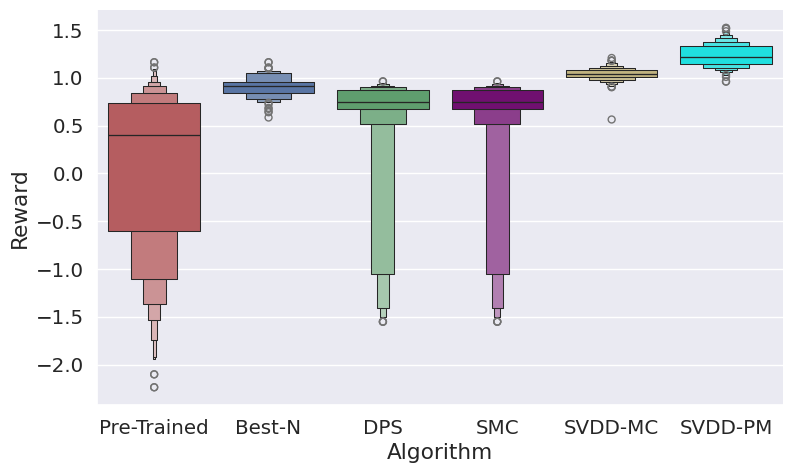

In [93]:

compare = np.concatenate( (pre_trained , bestk, SMC, SMC, decoding, decoding2 ), axis= 0)

type1 = ['Pre-Trained' for i in range(len(pre_trained ))]
type2 = ['Best-N' for i in range(len(bestk))]
type3 = ['DPS' for i in range(len(SMC))]
type4 = ['SMC' for i in range(len(SMC))]
type5 = ['SVDD-MC' for i in range(len(decoding))]
type6 = ['SVDD-PM' for i in range(len(decoding2))]

type =   type1 + type2   + type3 +  type4 + type5 + type6
data_dict = {'Algorithm': type, 'Reward': compare }
plot_data = pd.DataFrame(data_dict)
my_pal = {"Pre-Trained": "r", "Best-N": "b", "DPS": "g", "SMC": "purple", "SVDD-MC":"y", "SVDD-PM":"cyan"}
fig = sns.catplot(data=plot_data, x = 'Algorithm', y =  'Reward', hue="Algorithm", kind="boxen" , palette=my_pal, height= 5.0, aspect= 8.2/5.0)
sns.set(font_scale=1.3)
#fig.savefig("media/sequence_DNA.png")
fig.savefig("media/sequence_RNA.png")
#fig.savefig("media/sequence_RNA_stability.png")
